In [1]:
import json, requests, time
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('postgresql://postgres:argmax@pg:5432/postgres')


# Data
Every time a user opens a mobile app, an auction is going on behind the scenes. The highest bidder gets to advertise his ad to the user.
## Auctions Table

In [2]:
sql_query = 'SELECT * FROM auctions;'
with engine.connect() as db_con:
    df_auctions = pd.read_sql(sql_query, con=db_con)

# overcome the problem of duplicates rows
del df_auctions['id']
df_auctions = df_auctions.drop_duplicates()
df_auctions

,eventTimestamp,unitDisplayType,brandName,bundleId,countryCode,deviceId,osAndVersion,bidFloorPrice,sentPrice
0,1657758857892,rewarded,Generic,com.loop.match3d,US,6a0a94554cf,Android-4.0,0.05,0.06
1,1657210707978,interstitial,Generic,com.loop.match3d,ZA,6a0b0e59f45,Android-4.0,0.01,0.16
2,1657392939412,interstitial,Motorola,com.YayySAL.DodgeAgent,BR,6a0fa820c46,Android-10.0,0.05,0.06
3,1657386816882,interstitial,Huawei,com.tintash.nailsalon,IQ,6a142bdbea2,Android-9.0,0.01,0.05
4,1657211600823,banner,Generic,com.tilegarden.match3,US,6a16943a771,Android-4.0,0.01,0.03
...,...,...,...,...,...,...,...,...,...
41579,1657731605063,banner,Generic,com.tilegarden.match3,NZ,80edf5837e8,Android-4.0,0.01,0.02
41580,1657657131101,interstitial,Apple,1436213906,VN,80ee6a5eebf,iOS-13.6,0.01,0.90
41581,1657156070854,rewarded,Generic,com.loop.match3d,US,80efe531afc,Android-4.0,0.05,0.69
41582,1657659603568,banner,Apple,1502447854,US,80f02dd397f,iOS-15.0,0.01,0.10


## App Vectors table
We've gathered the first few sentences from the app store description and embedded it with a [model](https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1)

In [3]:
sql_query = f'''
SELECT
    *
FROM app_vectors
'''
has_embedding = False
while not has_embedding:
    with engine.connect() as db_con:
        df_embedings = pd.read_sql(sql_query, con=db_con)
    has_embedding = (~df_embedings["embedding"].isna()).all()
    if not has_embedding:
        print("Waiting for embeddings...")
        time.sleep(15)

del df_embedings['id']
df_embedings = df_embedings.drop_duplicates()
df_embedings

,bundleId,content,embedding
0,com.loop.match3d,"Get ready for a new, challenging and original ...","[0.3168352,0.6250086,-0.12035585,0.21742323,-0..."
1,com.YayySAL.DodgeAgent,"Your mission, should you choose to accept it, ...","[0.5411282,0.7446755,-0.5817451,0.95967793,0.0..."
2,com.tintash.nailsalon,It is manicure madness over here and it�s your...,"[0.31176656,0.6059464,-1.1395648,0.07631045,-0..."
3,com.tilegarden.match3,\nIf you enjoy playing Match 3 tile & mahjong ...,"[0.050924458,1.0967327,-0.30831614,0.13220672,..."
4,com.AppIdeas.LevelUpRunner,"Are you a real hero? Are you the strongest, th...","[0.897561,0.46442518,-0.18019226,1.2617054,0.0..."
5,1582745578,Dominate the coal industry and become the next...,"[0.88490486,0.65851957,-0.3386694,0.18323663,0..."
6,1569586264,Choose the appropriate outfit to make it throu...,"[0.2000534,0.36083463,-0.13792263,0.34308642,-..."
7,com.kamilbilge.ropesavior3d,Become the hero we need in this tangled puzzle...,"[0.5112473,0.5128061,-0.05630451,1.2819325,0.1..."
8,se.ace.fishinc,Gather your riches and travel across the open ...,"[0.73094344,0.4112171,-0.6196014,0.53501374,0...."
9,com.volt.dresstoimpress,\nChoose the appropriate outfit to make it thr...,"[0.2000534,0.36083463,-0.13792263,0.34308642,-..."


In [4]:
#counting unique bundles values for two sets (tables)
embs_bundles = df_embedings['bundleId'].unique()
auctions_bundles = df_auctions['bundleId'].unique()
print(len(auctions_bundles), len(embs_bundles))
print(len(set(auctions_bundles) - set(embs_bundles)))

18 18
0


We can use the `<=>` operator to run vector search within the database

In [5]:
!pip install scikit-learn

In [6]:
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
from itertools import combinations
print(list(combinations([1,2,3], 2)))

[(1, 2), (1, 3), (2, 3)]


In [8]:
df_bundles_prices = df_auctions[['bundleId', 'sentPrice']].groupby('bundleId').mean()
df_bundles_prices

,sentPrice
bundleId,
1436213906,4.718555
1502447854,2.269482
1523081624,1.101837
1529614832,3.121816
1542256628,2.114797
1569586264,18.900179
1579489488,1.113208
1582745578,2.179091
1586795332,1.598364


In [9]:
# get pairs similarity
bundles_vectors = {bundle_id:[float(i) for i in embeddings[1:-1].split(",")] for bundle_id, embeddings in zip(df_embedings['bundleId'], df_embedings['embedding'])}

data = []
for i, j in combinations(auctions_bundles, 2):
    data.append([i, j, cosine_similarity([bundles_vectors[i]], [bundles_vectors[j]])[0][0], df_bundles_prices.loc[i]['sentPrice'], df_bundles_prices.loc[j]['sentPrice']])

main_df  = pd.DataFrame(data, columns=['ai','aj','cosij','pi','pj'])
main_df

,ai,aj,cosij,pi,pj
0,com.loop.match3d,com.YayySAL.DodgeAgent,0.480975,1.420811,0.445529
1,com.loop.match3d,com.tintash.nailsalon,0.459344,1.420811,0.300057
2,com.loop.match3d,com.tilegarden.match3,0.658637,1.420811,2.297261
3,com.loop.match3d,com.kamilbilge.ropesavior3d,0.557880,1.420811,0.451491
4,com.loop.match3d,1529614832,0.719058,1.420811,3.121816
...,...,...,...,...,...
148,dovi.coalmining.inc,1582745578,1.000000,0.593311,2.179091
149,dovi.coalmining.inc,1569586264,0.377867,0.593311,18.900179
150,1586795332,1582745578,0.449943,1.598364,2.179091
151,1586795332,1569586264,0.537237,1.598364,18.900179


In [10]:
!pip install matplotlib

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
main_df['abs_diff'] = abs(main_df.pi - main_df.pj)
main_df.head()

,ai,aj,cosij,pi,pj,abs_diff
0,com.loop.match3d,com.YayySAL.DodgeAgent,0.480975,1.420811,0.445529,0.975282
1,com.loop.match3d,com.tintash.nailsalon,0.459344,1.420811,0.300057,1.120754
2,com.loop.match3d,com.tilegarden.match3,0.658637,1.420811,2.297261,0.876449
3,com.loop.match3d,com.kamilbilge.ropesavior3d,0.557880,1.420811,0.451491,0.969321
4,com.loop.match3d,1529614832,0.719058,1.420811,3.121816,1.701005


In [13]:
!pip install statsmodels

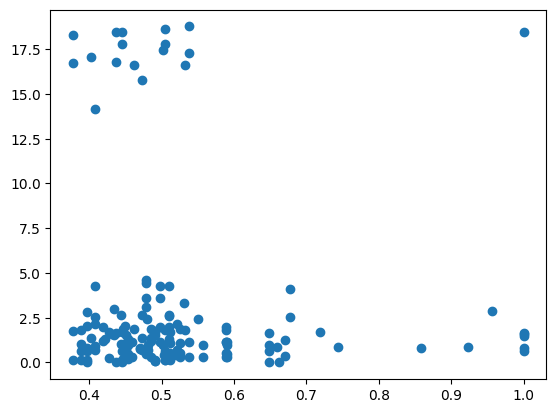

In [14]:
plt.scatter(main_df.cosij, main_df.abs_diff)
plt.show()

In [15]:
from statsmodels.api import OLS


In [16]:
main_df['constant'] = 1
model = OLS(main_df.abs_diff, main_df[['constant', 'cosij']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               abs_diff   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6078
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.437
Time:                        10:43:01   Log-Likelihood:                -467.61
No. Observations:                 153   AIC:                             939.2
Df Residuals:                     151   BIC:                             945.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       4.3649      1.667      2.619      0.0

In [17]:
df_auctions.columns.to_list()

['eventTimestamp',
 'unitDisplayType',
 'brandName',
 'bundleId',
 'countryCode',
 'deviceId',
 'osAndVersion',
 'bidFloorPrice',
 'sentPrice']

In [18]:
from statsmodels.formula.api import ols

In [19]:
df_auctions_regression_data = df_auctions.copy()
df_auctions_regression_data['osAndVersion'] = df_auctions_regression_data['osAndVersion'].apply(lambda x:x.split("-")[0])
model2 = ols(f'sentPrice ~ C(osAndVersion) + C(countryCode) + C(bundleId) + bidFloorPrice', data=df_auctions_regression_data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              sentPrice   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:43:04   Log-Likelihood:            -1.3945e+05
No. Observations:               41584   AIC:                         2.793e+05
Df Residuals:                   41395   BIC:                         2.809e+05
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [20]:
model3 = ols(f'sentPrice ~ C(osAndVersion) +C(bundleId) + bidFloorPrice', data=df_auctions_regression_data).fit(cov_type="HC0")
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              sentPrice   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     179.5
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:43:05   Log-Likelihood:            -1.3991e+05
No. Observations:               41584   AIC:                         2.799e+05
Df Residuals:                   41565   BIC:                         2.800e+05
Df Model:                          18                                         
Covariance Type:                  HC0                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [25]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.2 MB/s eta 0:00:0000:0100:02


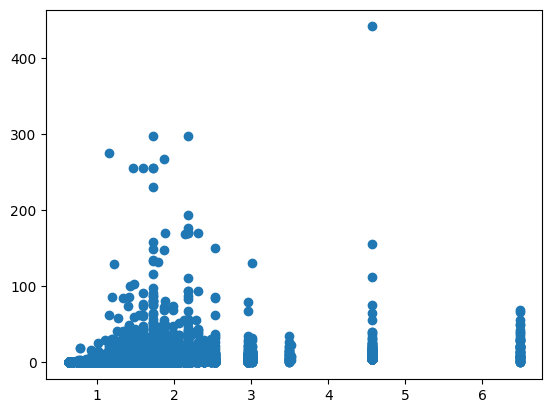

In [30]:
import xgboost as xgb
X = pd.get_dummies(df_auctions_regression_data.drop('sentPrice', axis=1)[['bundleId', 'countryCode', 'osAndVersion', 'bidFloorPrice']])
y = df_auctions_regression_data['sentPrice']
xgbmodel = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgbmodel.fit(X, y)
y_pred = xgbmodel.predict(X)
plt.scatter(y_pred, y)
plt.show()

In [33]:
from sklearn.metrics import r2_score
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.029547510106327834


In [34]:
# very low R2 on train set, the linear regression give as better score, no point to keep looking for high variance model
